In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DatosSeguros.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1349 non-null   int64  
 1   sexo          1349 non-null   object 
 2   imc           1347 non-null   float64
 3   hijos         1349 non-null   int64  
 4   fumador       1347 non-null   object 
 5   region        1349 non-null   object 
 6   valor_seguro  1349 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.9+ KB


In [4]:
df.isnull().sum()

edad            0
sexo            0
imc             2
hijos           0
fumador         2
region          0
valor_seguro    0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1345 non-null   int64  
 1   sexo          1345 non-null   object 
 2   imc           1345 non-null   float64
 3   hijos         1345 non-null   int64  
 4   fumador       1345 non-null   object 
 5   region        1345 non-null   object 
 6   valor_seguro  1345 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 84.1+ KB


In [7]:
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          1333 non-null   int64  
 1   sexo          1333 non-null   object 
 2   imc           1333 non-null   float64
 3   hijos         1333 non-null   int64  
 4   fumador       1333 non-null   object 
 5   region        1333 non-null   object 
 6   valor_seguro  1333 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.3+ KB


In [9]:
edad = df.sort_values('edad')

In [10]:
edad.head(10)

,edad,sexo,imc,hijos,fumador,region,valor_seguro
1097,18,F,31.350,4,no,Boyaca,4561.18850
59,18,M,31.680,2,yes,Cundinamarca,34303.16720
1251,18,M,33.330,0,no,Cundinamarca,1135.94070
297,18,M,22.990,0,no,Boyaca,1704.56810
1255,18,F,39.820,0,no,Cundinamarca,1633.96180
944,18,F,40.185,0,no,Boyaca,2217.46915
1152,18,F,30.305,0,no,Boyaca,2203.73595
665,18,M,33.660,0,no,Cundinamarca,1136.39940
52,18,F,35.625,0,no,Boyaca,2211.13075
650,18,M,28.500,0,no,Boyaca,1712.22700


In [11]:
rangos = [17,28,38,48,58,68]

In [12]:
nombrerangos = ['A','B','C','D','E']

In [13]:
df ['Rango_Edad'] = pd.cut(df['edad'],rangos,labels = nombrerangos)

In [14]:
df.head()

,edad,sexo,imc,hijos,fumador,region,valor_seguro,Rango_Edad
0,19,F,27.900,0,yes,Caribe,16884.92400,A
3,18,M,33.770,1,no,Cundinamarca,1725.55230,A
4,28,M,33.000,3,no,Cundinamarca,4449.46200,A
5,33,M,22.705,0,no,Antioquia,21984.47061,B
6,32,M,28.880,0,no,Antioquia,3866.85520,B


In [15]:
df.describe()

,edad,imc,hijos,valor_seguro
count,1333.000000,1333.000000,1333.000000,1333.000000
mean,39.195049,30.652097,1.092273,13261.908454
std,14.052008,6.097609,1.205484,12093.507648
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.675000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'edad'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'hijos'}>,
        <Axes: title={'center': 'valor_seguro'}>]], dtype=object)

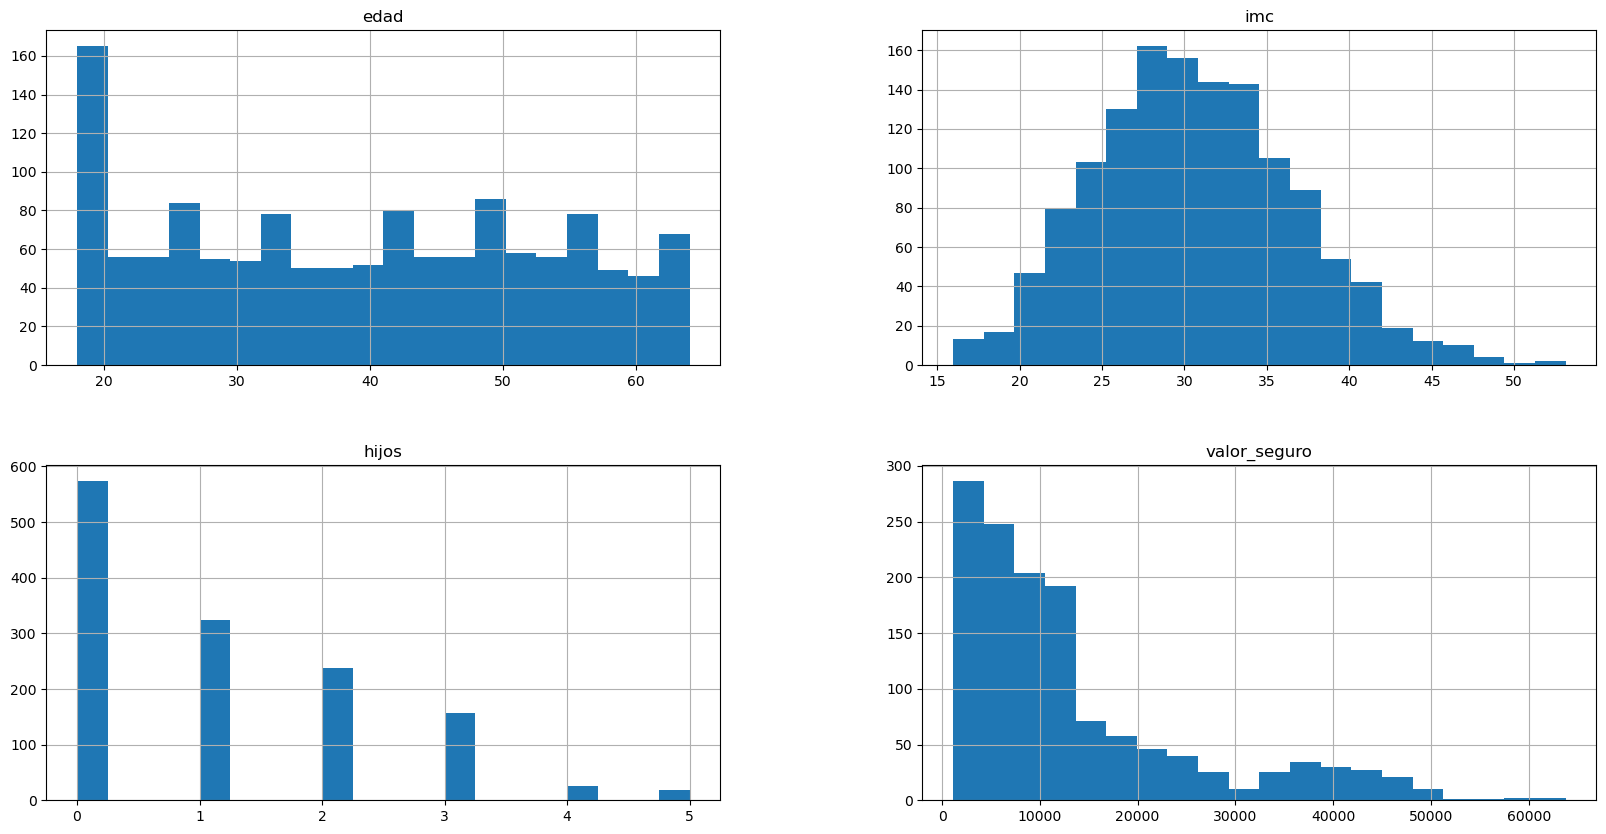

In [16]:
df.hist(bins=20, figsize=(20,10))

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

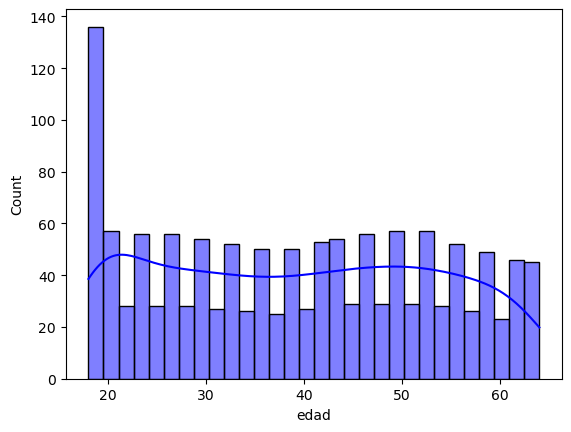

In [42]:
sns.histplot(df.edad, color ="b", bins = 30, kde = True)
plt.show()

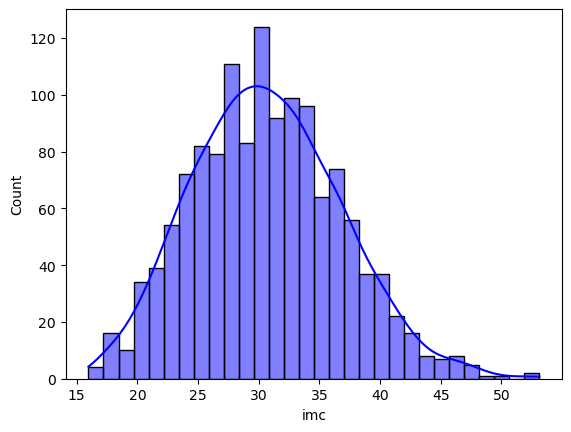

In [44]:
sns.histplot(df.imc, color ="b", bins = 30, kde = True)
plt.show()

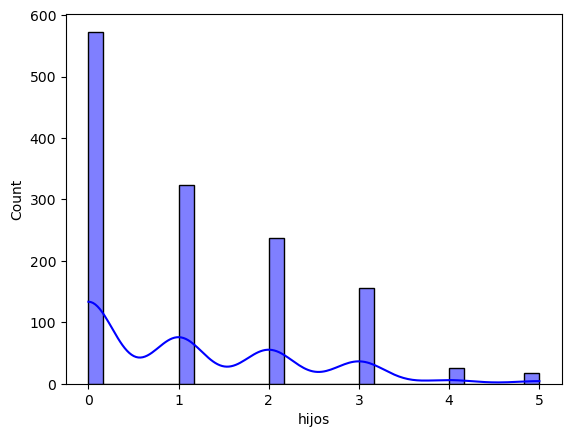

In [46]:
sns.histplot(df.hijos, color ="b", bins = 30, kde = True)
plt.show()

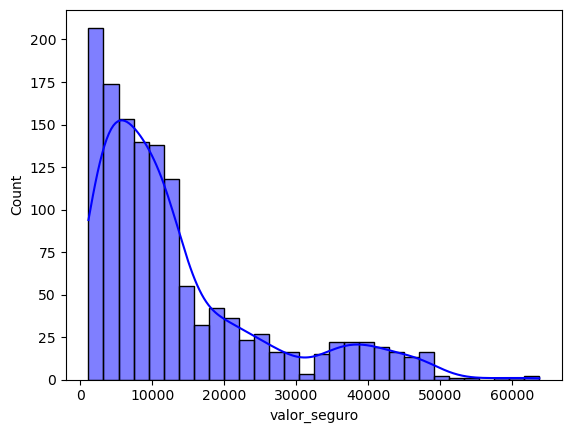

In [48]:
sns.histplot(df.valor_seguro, color ="b", bins = 30, kde = True)
plt.show()

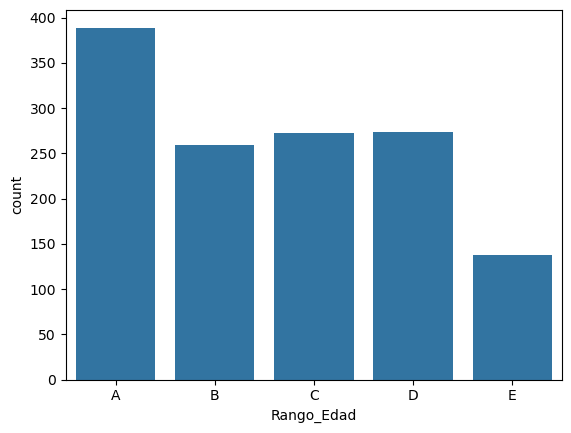

In [56]:
plt. Figure(figsize=(10,7)) 
sns.countplot(x= df.Rango_Edad)
plt.show()

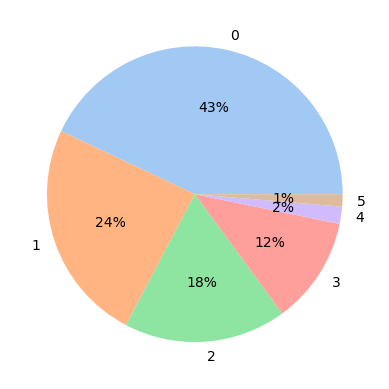

In [109]:
total_hijos = df['hijos'].groupby(df['hijos']).count()  
etiquetas = total_hijos.index
colors = sns.color_palette('pastel')[0:6] 
plt.pie(total_hijos, labels = etiquetas, colors = colors, 
autopct='%.0f%%') 
plt.show()

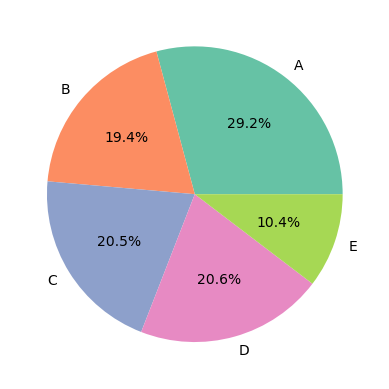

In [107]:
total_rango_edad = df['Rango_Edad'].groupby(df['Rango_Edad'], observed = True).count() 
labels = total_rango_edad.index
colors = sns.color_palette('Set2')[0:5] 
plt.pie(total_rango_edad, labels = labels, colors = colors, autopct='%.1f%%') 
plt.show() 

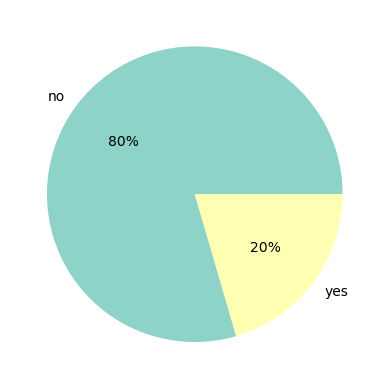

In [105]:
total_fumadores = df['fumador'].groupby(df['fumador']).count() 
labels = total_fumadores.index
colors = sns.color_palette('Set3')[0:2] 
plt.pie(total_fumadores, labels = labels, colors = colors, autopct='%.0f%%') 
plt.show() 

In [ ]:
Distribución de compra de seguro por categoria fumadores

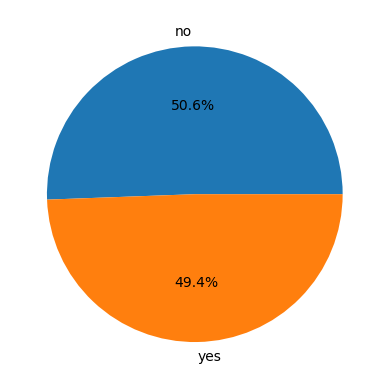

In [153]:
valor_total_por_fumador = df.groupby('fumador')['valor_seguro'].sum()
plt.pie(valor_total_por_fumador.values, labels = valor_total_por_fumador.index, autopct ='%.1f%%')
plt.show()

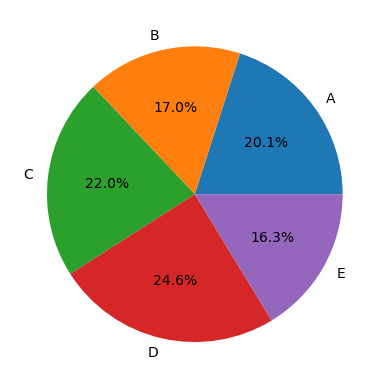

In [161]:
valor_total_por_rango_edad = df.groupby('Rango_Edad', observed=True)['valor_seguro'].sum()
plt.pie(valor_total_por_rango_edad.values, labels = valor_total_por_rango_edad.index, autopct ='%.1f%%')
plt.show()

<Axes: >

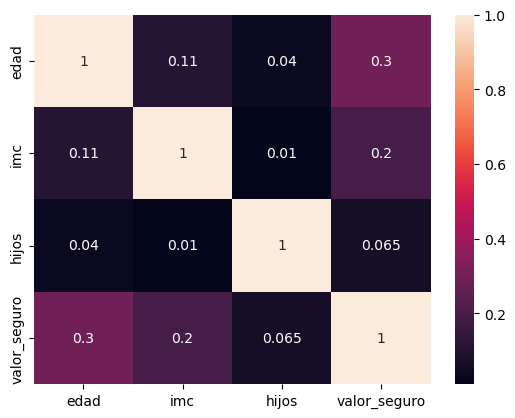

In [182]:
correlacion = df.corr(numeric_only=True)
sns.heatmap(correlacion,xticklabels=correlacion.columns,yticklabels=correlacion.columns,annot=True)

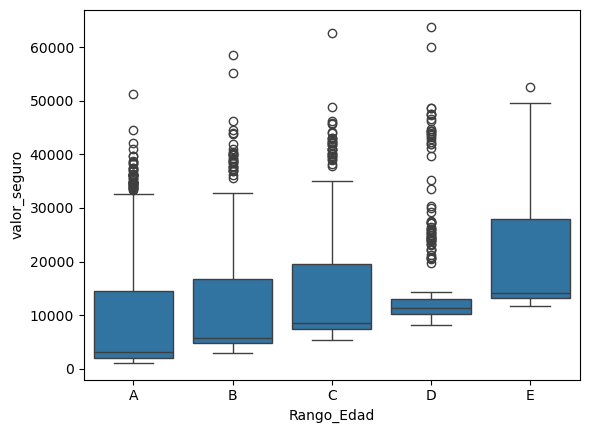

In [72]:
Redad_valor = sns.boxplot(x=df["Rango_Edad"], y=df["valor_seguro"]) 

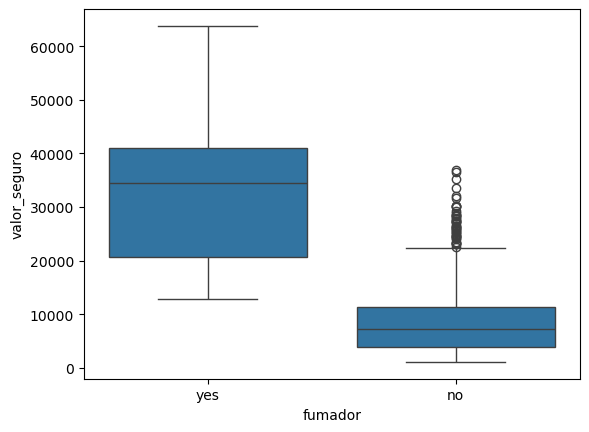

In [74]:
fumador_valor = sns.boxplot(x=df["fumador"], y=df["valor_seguro"])

In [ ]:
Relaciones multivariado:

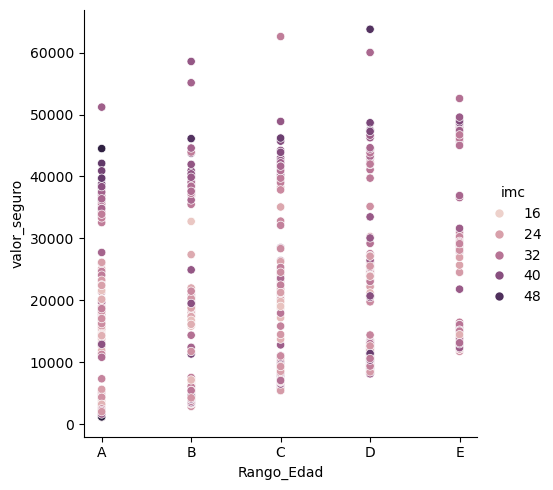

In [184]:
sns.relplot(x='Rango_Edad' ,y='valor_seguro',hue='imc',data=df)

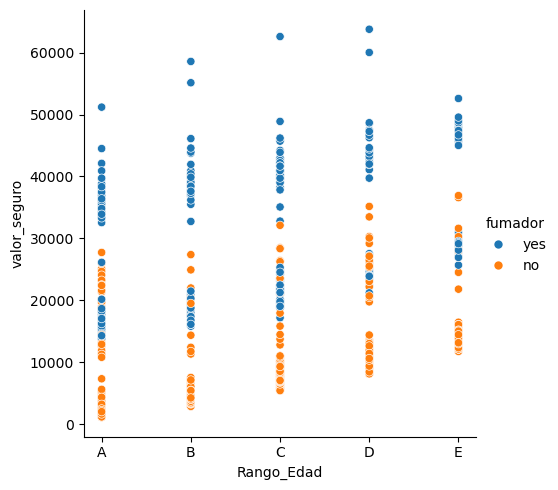

In [186]:
sns.relplot(x='Rango_Edad', y='valor_seguro',hue='fumador',data=df)

<Axes: xlabel='region', ylabel='valor_seguro'>

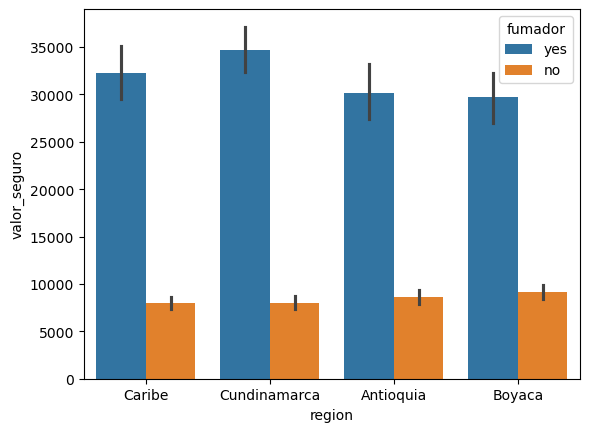

In [188]:
sns.barplot(data=df,x='region',y='valor_seguro',hue='fumador')